# 1.3.1 Importing Data Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn import linear_model

# 1.3.2 Reading the csv file

In [ ]:
fuel_data = pd.read_csv('Fuel.csv')
fuel_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# 1.3.3 Data visualization

Text(0.5, 1.0, 'Histogram of Carbon Emission')

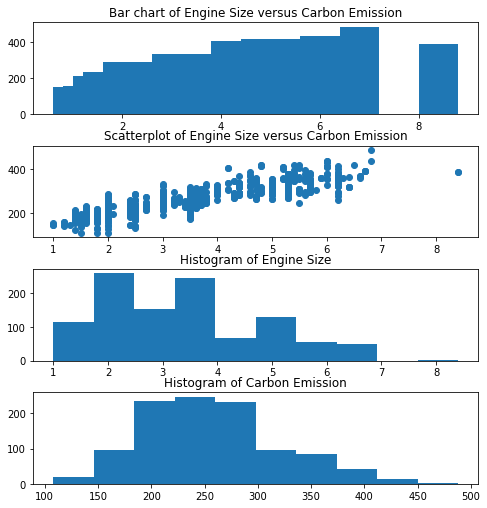

In [ ]:
'''
Since we want to model the relationship between the type of engine size and the  amount of CO2 emission
Independent variable become ENGINESIZE,
Dependent variable (target) become CO2EMISSIONS
'''
engine_size = fuel_data['ENGINESIZE']
co_emmision = fuel_data['CO2EMISSIONS']

fig, axs = plt.subplots(4,figsize=(7,7))
fig.tight_layout()
axs[0].bar(engine_size,co_emmision)
axs[0].set_title("Bar chart of Engine Size versus Carbon Emission")
axs[1].scatter(engine_size,co_emmision)
axs[1].set_title("Scatterplot of Engine Size versus Carbon Emission")
axs[2].hist(engine_size)
axs[2].set_title("Histogram of Engine Size")
axs[3].hist(co_emmision)
axs[3].set_title("Histogram of Carbon Emission")

# 1.3.3 Generating train & test data

In [ ]:
train = fuel_data[:(int((len(fuel_data)*0.8)))]
test = fuel_data[(int((len(fuel_data)*0.8))):]
print((int((len(fuel_data)*0.8))))
print("Size of train dataset: ",train.shape[0])
print("Size of test dataset: ",test.shape[0])

853
Size of train dataset:  853
Size of test dataset:  214


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
train_x = np.array(train[["ENGINESIZE"]])
train_y = np.array(train[["CO2EMISSIONS"]])

regressor.fit(train_x,train_y)
print ('Coefficients: ', regressor.coef_)
print ('Intercept: ',regressor.intercept_)

Coefficients:  [[38.79512384]]
Intercept:  [127.16989951]


# 1.3.4 Plot the regression line

Text(0, 0.5, 'Emission')

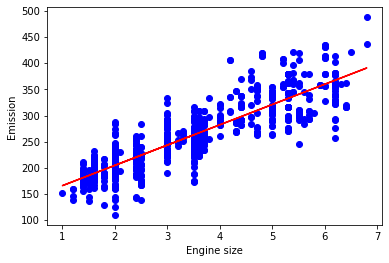

In [ ]:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color='blue')
plt.plot(train_x, regressor.coef_*train_x + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

# 1.3.5 Predict future values

In [ ]:
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values

my_engine_size = [3.5, 2.0, 1.5]
for engine_size in my_engine_size:
  estimatd_emission = get_regression_predictions(engine_size,regressor.intercept_[0],regressor.coef_[0][0])
  print ("Engine Size :",engine_size)
  print ("Estimated Emission :",estimatd_emission)

Engine Size : 3.5
Estimated Emission : 262.9528329350173
Engine Size : 2.0
Estimated Emission : 204.7601471809325
Engine Size : 1.5
Estimated Emission : 185.36258526290425


# 1.3.6 Evaluate your model

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_yhat = regressor.predict(test_x)

mae = metrics.mean_absolute_error(test_y, test_yhat)
mse = metrics.mean_squared_error(test_y, test_yhat)
r2 = metrics.r2_score(test_y,test_yhat)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("R-Squared:", r2)

Results:
MAE: 20.602197903009664
MSE: 746.4537521463635
R-Squared: 0.7861345372905517
